In [1]:
import numpy as np
import h5py
import treecorr
import pandas as pd
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.DataFrame()
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5','r') as f:
    g = f["stars"]
    data['ra'] = g["ra"][:]
    data['dec'] = g["dec"][:]
    data['e1'] = g["measured_e1"][:]
    data['e2'] = g["measured_e2"][:]
    data['e1_model'] = g["model_e1"][:]
    data['e2_model'] = g["model_e2"][:]
    
    data['de1'] = data['e1'] - g["model_e1"][:]
    data['de2'] = data['e2'] - g["model_e2"][:]
    #T_frac = (g["measured_T"][:] - g["model_T"][:]) / g["measured_T"][:]
    data['T_frac'] = (g["measured_T"][:] ** 2 - g["model_T"][:] ** 2) / g["measured_T"][:] ** 2
    data['calib_psf_reserved'] = np.array(g["calib_psf_reserved"][:])
    data['calib_psf_used'] = np.array(g["calib_psf_used"][:])

In [3]:
data

,ra,dec,e1,e2,e1_model,e2_model,de1,de2,T_frac,calib_psf_reserved,calib_psf_used
0,-35.083374,-51.494617,-0.026112,-0.014672,-0.016419,0.007253,-0.009693,-0.021925,-0.012806,1,0
1,-35.078476,-51.477619,-0.026059,0.019919,-0.016182,0.008198,-0.009877,0.011721,0.039352,1,0
2,-35.062531,-51.522213,-0.012536,0.004537,-0.018153,0.004877,0.005617,-0.000340,0.007127,1,0
3,-34.960102,-51.518063,-0.018434,0.007310,-0.020237,0.005128,0.001803,0.002182,-0.024512,1,0
4,-34.956352,-51.404015,-0.040547,-0.019234,-0.019844,0.007709,-0.020703,-0.026943,-0.021202,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14468765,89.349655,-40.749531,-0.058523,0.019931,-0.047208,0.032002,-0.011315,-0.012071,0.070854,1,0
14468766,89.343872,-40.641918,-0.041997,0.037199,-0.024508,0.032636,-0.017489,0.004563,0.033485,1,0
14468767,89.400398,-40.720074,-0.057028,0.065962,-0.045246,0.037283,-0.011781,0.028679,0.063234,1,0
14468768,89.332405,-40.664532,-0.020369,0.050319,-0.025990,0.029436,0.005621,0.020883,-0.013556,1,0


In [ ]:
data_reserved= data.loc[data['calib_psf_reserved']==1]
data_reserved

In [ ]:
data_used=data.loc[data['calib_psf_used']==0]
data_used

In [4]:
#rho 1 
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0, sep_units="arcmin", bin_slop=0.01)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
corr.process(cat1)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)


[  0.59563868   0.81259341   1.1086517    1.51272069   2.06399727
   2.81606181   3.84231785   5.24234135   7.15269267   9.76343815
  13.31552423  18.17278161  24.78687654  33.81952214  46.13782524
  62.93466188  85.83729161 117.08588566 159.65910437 217.6970272 ]
[2.72463660e-06 2.73653894e-06 2.24346627e-06 1.92135229e-06
 1.43156060e-06 7.88311733e-07 3.30841923e-07 6.40664516e-08
 1.72819611e-08 6.80926380e-08 5.94137517e-08 5.09561501e-08
 5.35205376e-08 5.17682819e-08 5.75868003e-08 5.60311319e-08
 5.45084390e-08 5.35475890e-08 5.32942321e-08 5.04370417e-08]
[1.06029899e-07 7.80311769e-08 5.75311416e-08 4.23794930e-08
 3.11844079e-08 2.29427377e-08 1.68815147e-08 1.24266473e-08
 9.14727700e-09 6.70852604e-09 4.93282327e-09 3.62870821e-09
 2.66996830e-09 1.96609939e-09 1.45221043e-09 1.07800986e-09
 8.05519703e-10 6.06013378e-10 4.60404911e-10 3.54461518e-10]


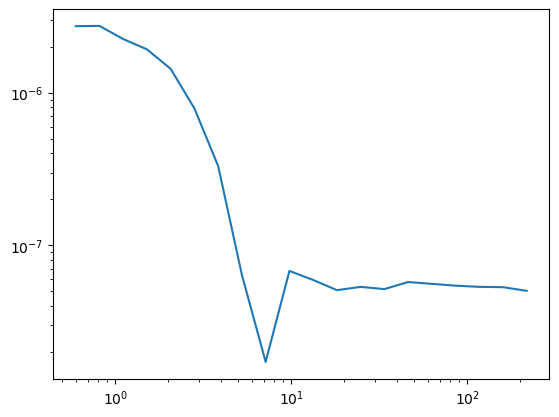

In [5]:
mplot.loglog(corr.meanr, corr.xip)

In [7]:
#rho 2 
corr = treecorr.GGCorrelation(nbins=20,min_sep= 0.5,max_sep= 250.0,sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1'], g2=data['e2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['de1'], g2=data['de2'], ra_units="deg", dec_units="deg")
corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.59549652   0.81242703   1.10841995   1.51246004   2.06375658
   2.81594173   3.84241845   5.24269856   7.15333031   9.76440525
  13.31683957  18.17477326  24.78972197  33.8238866   46.14484866
  62.9444865   85.8530983  117.10934247 159.69159517 217.74483827]
[1.51010564e-06 1.61643795e-06 1.16668594e-06 1.08484281e-06
 8.61386104e-07 3.31300361e-07 1.73194279e-07 2.19077615e-07
 3.12690231e-07 4.31562541e-07 4.55942002e-07 5.29093266e-07
 5.89774765e-07 5.78574702e-07 5.70937640e-07 6.44890924e-07
 6.78594996e-07 7.05829726e-07 7.07601645e-07 7.07814640e-07]
[1.44623897e-07 1.06453842e-07 7.84863727e-08 5.78102241e-08
 4.25375728e-08 3.12920937e-08 2.30244145e-08 1.69482470e-08
 1.24754364e-08 9.14926523e-09 6.72751972e-09 4.94882112e-09
 3.64127027e-09 2.68128090e-09 1.98039318e-09 1.47010799e-09
 1.09846480e-09 8.26392777e-10 6.27856963e-10 4.83356684e-10]


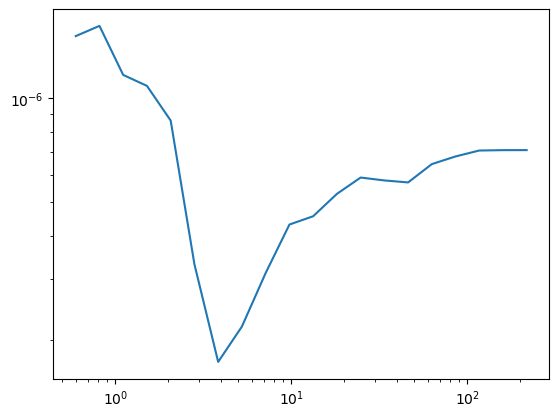

In [8]:
mplot.loglog(corr.meanr, corr.xip)